## Bag of N-grams


We use sklearn CountVectorizer to create the Bag of Words

Documentation https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

We can use binary= True to see if the word appears or not, no need to count

### Uni-gram ==one word

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]

In [5]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect3 = CountVectorizer(ngram_range=(1,1)) #set a range
# Build a BOW representation for the corpus
bow_rep3 = count_vect3.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect3.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep3[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep3[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect3.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for dog bites man :  [[1 1 0 0 1 0]]
BoW representation for man bites dog :  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


### Bi-gram == two words

In [6]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect4 = CountVectorizer(ngram_range=(2,2)) #set a range
#Build a BOW representation for the corpus
bow_rep4 = count_vect4.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect4.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep4[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep4[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect4.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog bites': 2, 'bites man': 1, 'man bites': 6, 'bites dog': 0, 'dog eats': 3, 'eats meat': 5, 'man eats': 7, 'eats food': 4}
BoW representation for dog bites man :  [[0 1 1 0 0 0 0 0]]
BoW representation for man bites dog :  [[1 0 0 0 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 0 0 0 0 0]]


### tri-gram == three words

In [7]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect5 = CountVectorizer(ngram_range=(3,3)) #set a range
#Build a BOW representation for the corpus
bow_rep5 = count_vect5.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect5.vocabulary_)
#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep5[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep5[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect5.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog bites man': 0, 'man bites dog': 2, 'dog eats meat': 1, 'man eats food': 3}
BoW representation for dog bites man :  [[1 0 0 0]]
BoW representation for man bites dog :  [[0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 0]]


### Bag of N-grams
Let's have uni-gram. bi-gram, and tri-gram all together

In [8]:
#Ngram vectorization example with count vectorizer and uni-gram first
count_vect5 = CountVectorizer(ngram_range=(1,3)) #set a range from 1 to 3 gram
#Build a BOW representation for the corpus
bow_rep5 = count_vect5.fit_transform(processed_docs)

#Look at the vocabulary mapping


print("Our vocabulary: ", {k: v for k, v in sorted(count_vect5.vocabulary_.items(), key=lambda item: item[1])})  #count_vect5.vocabulary_ is the dict, let's sort it

#see the BOW rep for first 2 documents
print("BoW representation for" , processed_docs[0], ": ", bow_rep5[0].toarray())
print("BoW representation for" , processed_docs[1], ": ",bow_rep5[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect5.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'bites': 0, 'bites dog': 1, 'bites man': 2, 'dog': 3, 'dog bites': 4, 'dog bites man': 5, 'dog eats': 6, 'dog eats meat': 7, 'eats': 8, 'eats food': 9, 'eats meat': 10, 'food': 11, 'man': 12, 'man bites': 13, 'man bites dog': 14, 'man eats': 15, 'man eats food': 16, 'meat': 17}
BoW representation for dog bites man :  [[1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]]
BoW representation for man bites dog :  [[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


# TF-IDF

YOu can flex your Python to calculate TF, IDF, then TF-IDF, but you don't have to. Sklearn have it covered

Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

L2 normalization is a way to make the vector smaller to save computing power but still retain enough information

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer create transform the data into vector, and then create tf-idf for each document

tfidf = TfidfVectorizer() #norm =l2 so the results of the tf-idf changes to account for square results so sum of squares of vector elements is 1
bow_rep_tfidf = tfidf.fit_transform(processed_docs)


In [10]:
bow_rep_tfidf.todense()

matrix([[0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
         0.        ],
        [0.65782931, 0.53256952, 0.        , 0.        , 0.53256952,
         0.        ],
        [0.        , 0.44809973, 0.55349232, 0.        , 0.        ,
         0.70203482],
        [0.        , 0.        , 0.55349232, 0.70203482, 0.44809973,
         0.        ]])

In [11]:
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [12]:
#get term frequency via Document Term Matrix. Row = Document. Column = Term. Matrix = Table
tf_dtm = tfidf.fit_transform(processed_docs).todense() #toarray returns an ndarray; todense returns a matrix.
tokens = tfidf.get_feature_names_out()
term_frequency = pd.DataFrame(data=tf_dtm,
                              columns=tokens)
print(term_frequency)

      bites      dog      eats      food      man      meat
0  0.657829  0.53257  0.000000  0.000000  0.53257  0.000000
1  0.657829  0.53257  0.000000  0.000000  0.53257  0.000000
2  0.000000  0.44810  0.553492  0.000000  0.00000  0.702035
3  0.000000  0.00000  0.553492  0.702035  0.44810  0.000000


In [13]:
#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)


IDF for all words in the vocabulary [1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]


In [14]:
tfidf.vocabulary_ #All words in the vocabulary.

{'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}

In [15]:
#TFIDF representation for all documents in our corpus
for i in range(len(processed_docs)):
 print("document: ",processed_docs[i])
 print("has a TFIDF vector representation:",bow_rep_tfidf.toarray()[i])

#order is based on the get_feature names


document:  dog bites man
has a TFIDF vector representation: [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
document:  man bites dog
has a TFIDF vector representation: [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
document:  dog eats meat
has a TFIDF vector representation: [0.         0.44809973 0.55349232 0.         0.         0.70203482]
document:  man eats food
has a TFIDF vector representation: [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]


In [16]:
temp = tfidf.transform(["dog and man dog are friends."])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

Tfidf representation for 'dog and man are friends':
 [[0.         0.89442719 0.         0.         0.4472136  0.        ]]


In [ ]:
#!pip install rank_bm25

In [66]:
from rank_bm25 import BM25Okapi


In [71]:
bm25 = BM25Okapi(processed_docs)

for i in range(len(processed_docs)):
 print("document: ",processed_docs[i])
 print("has a BM_25 vector representation:",bm25.get_scores(processed_docs[i]))


document:  dog bites man
has a BM_25 vector representation: [-4.20132649 -4.20132649 -4.30256327 -4.1507081 ]
document:  man bites dog
has a BM_25 vector representation: [-4.20132649 -4.20132649 -4.30256327 -4.1507081 ]
document:  dog eats meat
has a BM_25 vector representation: [-4.90998397 -4.90998397 -5.82111501 -5.01122075]
document:  man eats food
has a BM_25 vector representation: [-4.55565523 -4.55565523 -4.80874719 -4.31577807]


## Cosine Similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
corpus = ['The sun is the largest celestial body in the solar system',
          'The solar system consists of the sun and eight revolving planets',
          'Ra was the Egyptian Sun God',
          'The Pyramids were the pinnacle of Egyptian architecture',
          'The quick brown fox jumps over the lazy dog']

In [19]:
tfidf2 = TfidfVectorizer()
tfidf2matrix = tfidf2.fit_transform(corpus)

tf_dtm2 = tfidf2.fit_transform(corpus).todense()
tokens2 = tfidf2.get_feature_names_out()
term_frequency2 = pd.DataFrame(data=tf_dtm2,
                              columns=tokens2)
term_frequency2 #TF-IDF of the matrix

,and,architecture,body,brown,celestial,consists,dog,egyptian,eight,fox,...,pyramids,quick,ra,revolving,solar,sun,system,the,was,were
0,0.000000,0.000000,0.337218,0.000000,0.337218,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.272065,0.225839,0.272065,0.482058,0.000000,0.000000
1,0.346907,0.000000,0.000000,0.000000,0.000000,0.346907,0.000000,0.000000,0.346907,0.000000,...,0.000000,0.000000,0.000000,0.346907,0.279882,0.232328,0.279882,0.330606,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387878,0.000000,0.000000,...,0.000000,0.000000,0.480764,0.000000,0.000000,0.321974,0.000000,0.229087,0.480764,0.000000
3,0.000000,0.401284,0.000000,0.000000,0.000000,0.000000,0.000000,0.323754,0.000000,0.000000,...,0.401284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382428,0.000000,0.401284
4,0.000000,0.000000,0.000000,0.355599,0.000000,0.000000,0.355599,0.000000,0.000000,0.355599,...,0.000000,0.355599,0.000000,0.000000,0.000000,0.000000,0.000000,0.338890,0.000000,0.000000


In [20]:
# compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf2matrix, tfidf2matrix) #compare each doc with the entire corpus.
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


In [21]:
pd.DataFrame(data =cosine_sim, columns = corpus, index = corpus) #add corpus to review similarity

,The sun is the largest celestial body in the solar system,The solar system consists of the sun and eight revolving planets,Ra was the Egyptian Sun God,The Pyramids were the pinnacle of Egyptian architecture,The quick brown fox jumps over the lazy dog
The sun is the largest celestial body in the solar system,1.000000,0.364132,0.183147,0.184353,0.163364
The solar system consists of the sun and eight revolving planets,0.364132,1.000000,0.150541,0.217046,0.112039
Ra was the Egyptian Sun God,0.183147,0.150541,1.000000,0.213186,0.077635
The Pyramids were the pinnacle of Egyptian architecture,0.184353,0.217046,0.213186,1.000000,0.129601
The quick brown fox jumps over the lazy dog,0.163364,0.112039,0.077635,0.129601,1.000000


In [22]:
for i in range(len(cosine_sim)):
  print( corpus[i] ," with a cosine similarity score",cosine_sim[i].mean(), " of the corpus") #average similarity

The sun is the largest celestial body in the solar system  with a cosine similarity score 0.3789992007737229  of the corpus
The solar system consists of the sun and eight revolving planets  with a cosine similarity score 0.3687514886493497  of the corpus
Ra was the Egyptian Sun God  with a cosine similarity score 0.32490180416575665  of the corpus
The Pyramids were the pinnacle of Egyptian architecture  with a cosine similarity score 0.3488370518355636  of the corpus
The quick brown fox jumps over the lazy dog  with a cosine similarity score 0.29652785237971474  of the corpus


### how about BM25

In [85]:
# Tokenize
tokenized = [doc.lower().split() for doc in corpus]

# Fit BM25
bm25 = BM25Okapi(tokenized)

In [88]:
# Get BM25 scores - each doc as query against corpus
vectors = np.array([bm25.get_scores(doc) for doc in tokenized])

# Cosine similarity
sim_matrix = cosine_similarity(vectors)

# Display
labels = [doc for doc in corpus]
sim_df = pd.DataFrame(sim_matrix, index=labels, columns=labels)
sim_df.round(4)

,The sun is the largest celestial body in the solar system,The solar system consists of the sun and eight revolving planets,Ra was the Egyptian Sun God,The Pyramids were the pinnacle of Egyptian architecture,The quick brown fox jumps over the lazy dog
The sun is the largest celestial body in the solar system,1.0000,0.4606,0.2817,0.2903,0.2305
The solar system consists of the sun and eight revolving planets,0.4606,1.0000,0.2419,0.3157,0.1813
Ra was the Egyptian Sun God,0.2817,0.2419,1.0000,0.3037,0.1425
The Pyramids were the pinnacle of Egyptian architecture,0.2903,0.3157,0.3037,1.0000,0.1935
The quick brown fox jumps over the lazy dog,0.2305,0.1813,0.1425,0.1935,1.0000


In [102]:
for i in range(len(corpus)):
    mask = np.ones(len(corpus), dtype=bool) #Create array of [True, True, True, True, True]
    mask[i] = False #Set current doc's position to False
    total = sim_matrix[i, mask].sum() # to exclude 1, Get row i from similarity matrix, select only columns where mask is True (excludes self), sum them
    mean = sim_matrix[i, mask].mean() # to exclude 1, Get row i from similarity matrix, select only columns where mask is True (excludes self), average them
    print(corpus[i], "has", f"total similarity score of {total:.4f} and average similarity score of {mean:.4f}") #print output

The sun is the largest celestial body in the solar system has total similarity score of 1.2631 and average similarity score of 0.3158
The solar system consists of the sun and eight revolving planets has total similarity score of 1.1996 and average similarity score of 0.2999
Ra was the Egyptian Sun God has total similarity score of 0.9698 and average similarity score of 0.2424
The Pyramids were the pinnacle of Egyptian architecture has total similarity score of 1.1032 and average similarity score of 0.2758
The quick brown fox jumps over the lazy dog has total similarity score of 0.7477 and average similarity score of 0.1869


## going back to the original corpus
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]

In [23]:
temp = tfidf.transform(["dog and man are friends."])
cosine_sim1 = cosine_similarity(temp, bow_rep_tfidf.toarray()) #how similar the "dog and man are friends." with the corpus

In [24]:
pd.DataFrame(data =cosine_sim1, columns = processed_docs, index = ["dog and man are friends."]) #add corpus to review similarity

,dog bites man,man bites dog,dog eats meat,man eats food
dog and man are friends.,0.753167,0.753167,0.316854,0.316854


In [25]:
temp2 = tfidf.transform(["dog eats man"])
similar2 = cosine_similarity(temp2, bow_rep_tfidf.toarray()) #how similar the "dog eats man" with the corpus
print(similar2)
print(similar2.mean())

[[0.56726059 0.56726059 0.60274773 0.60274773]]
0.5850041623121691


In [26]:
pd.DataFrame(data =similar2, columns = processed_docs, index = ["dog eats man"]) #add corpus to review similarity

,dog bites man,man bites dog,dog eats meat,man eats food
dog eats man,0.567261,0.567261,0.602748,0.602748


In [27]:
#if you want 1 number then just do avg
cosine_similarity(temp, bow_rep_tfidf.toarray()).mean()

0.5350107008146793

# TF-IDF Example - News similarity

In [30]:
news_df = pd.read_csv("Data/bbc-news-data.csv",delimiter ="\t")

In [31]:
news_df.sample(10) #random inspect 10 samples

,category,filename,title,content
1171,politics,276.txt,Donor attacks Blair-Brown 'feud',The reported feud between Tony Blair and Gord...
1885,tech,062.txt,Ask Jeeves joins web log market,Ask Jeeves has bought the Bloglines website t...
232,business,233.txt,Bat spit drug firm goes to market,A German firm whose main product is derived f...
1454,sport,142.txt,Owen determined to stay in Madrid,England forward Michael Owen has told the BBC...
1538,sport,226.txt,Wolves appoint Hoddle as manager,Glenn Hoddle will be unveiled as the new Wolv...
2203,tech,380.txt,Sun offers processing by the hour,Sun Microsystems has launched a pay-as-you-go...
1027,politics,132.txt,Retirement age could be scrapped,"The ""myth that ageing is a barrier"" to contri..."
673,entertainment,164.txt,Parker's saxophone heads auction,A saxophone belonging to legendary jazz music...
119,business,120.txt,Nigeria to boost cocoa production,The government of Nigeria is hoping to triple...
442,business,443.txt,Kraft cuts snack ads for children,Kraft plans to cut back on advertising of pro...


In [34]:
#percent of news in each topic
news_df.category.value_counts(normalize=True).to_frame('count').style.format({'count': '{:,.2%}'.format})


,count
category,
sport,22.97%
business,22.92%
politics,18.74%
tech,18.02%
entertainment,17.35%


In [35]:
len(news_df) #how many documents

2225

In [37]:
#now create a tfidf for the news

tfidf = TfidfVectorizer(stop_words='english') #vectorize and elmininate english stop words
dtm_tfidf = tfidf.fit_transform(news_df.content)
tokens = tfidf.get_feature_names_out()
dtm_tfidf.shape #2225 docs with 28,980 terms!

(2225, 28980)

In [38]:
dtm_tfidf.sum(axis=0)

matrix([[ 0.30312836, 21.00030792,  0.06511574, ...,  0.12162892,
          0.30869429,  0.2497171 ]])

In [39]:
dtm_tfidf.sum(axis=0).A1

array([ 0.30312836, 21.00030792,  0.06511574, ...,  0.12162892,
        0.30869429,  0.2497171 ])

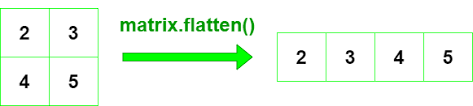

In [40]:
#add all tokens in a new DF with its associated tfidf score
#sort the toke by its tf-idf score
token_freq = (pd.DataFrame({'tfidf': dtm_tfidf.sum(axis=0).A1 #A1 to flatten the matrix to array
                            ,
                            'token': tokens})
              .sort_values('tfidf', ascending=False))

In [41]:
token_freq

,tfidf,token
22743,87.251494,said
17635,58.220783,mr
28821,41.982178,year
19471,37.303707,people
18044,34.197388,new
...,...,...
23933,0.014186,sioux
3381,0.014186,bane
3883,0.014186,biassed
8973,0.014186,duetted


# TD-IDF is a summarizer

In [42]:
article = news_df.sample(1).squeeze() #select 1 random article squeeze() to create  series
article_id = article.name

In [44]:
#print category, title, and title
print(article.category.capitalize())
print()
print(article.title)
print()
print(article.title)

Sport

Rush future at Chester uncertain

Rush future at Chester uncertain


In [45]:
#Select most relevant tokens by tfidf value
article_tfidf = dtm_tfidf[article_id].todense().A1 #look at the article in the dtm and get the flattened matrix A1 = flatten
article_tokens = pd.Series(article_tfidf, index=tokens) #create the token series based on the article tfidf
article_tokens.sort_values(ascending=False).head(10)

chester      0.600639
vaughan      0.277365
rush         0.220502
aizlewood    0.219167
liverpool    0.198394
league       0.165131
verbally     0.104040
severance    0.104040
manager      0.100385
hovering     0.100106
dtype: float64

In [46]:
article_tokens.sort_values(ascending=False).head(10) #here are the top term for the summary

chester      0.600639
vaughan      0.277365
rush         0.220502
aizlewood    0.219167
liverpool    0.198394
league       0.165131
verbally     0.104040
severance    0.104040
manager      0.100385
hovering     0.100106
dtype: float64

In [48]:
article.category #are they similar?

'sport'

In [51]:
#what if we randomly select the token in the text?
pd.Series(article.content.split()).sample(10).tolist()


['financial',
 'a',
 'after',
 'uncertain',
 'but',
 'Rush',
 'their',
 'Vaughan',
 "haven't",
 'as']

# TF-IDF as a proessing tasks for further analysis.

## Classifying news articles with Naive Bayes

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
y = pd.factorize(news_df.category)[0] #Encode the variable as categorical variable, 0='business', 1='entertainment', 2='politics', 3='sport', 4='tech'. [0] is the array [1] is the index
X = news_df.content

#train test split based on y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [55]:
pd.Series(y).value_counts()/len(y)

3    0.229663
0    0.229213
2    0.187416
4    0.180225
1    0.173483
Name: count, dtype: float64

In [56]:
#create tfidf vectors
tfidf = TfidfVectorizer(stop_words='english')
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = tfidf.transform(X_test)


In [57]:
nb = MultinomialNB() #train naives bayes classifier
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [58]:
#evaluate results
accuracy_score(y_test, y_pred_class)


0.9766606822262118

In [59]:
print(classification_report(y_true=y_test, y_pred=y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       128
           1       0.99      0.97      0.98        97
           2       0.94      0.99      0.96       104
           3       0.99      1.00      1.00       128
           4       0.98      0.95      0.96       100

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557



In [60]:
#look at the confusion matrix
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_class))


,0,1,2,3,4
0,124,0,3,0,1
1,0,94,2,0,1
2,1,0,103,0,0
3,0,0,0,128,0
4,1,1,2,1,95


In [63]:
#look at the confusion matrix with class names
pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred_class), index=pd.factorize(news_df.category)[1],columns = pd.factorize(news_df.category)[1] )

,business,entertainment,politics,sport,tech
business,124,0,3,0,1
entertainment,0,94,2,0,1
politics,1,0,103,0,0
sport,0,0,0,128,0
tech,1,1,2,1,95
